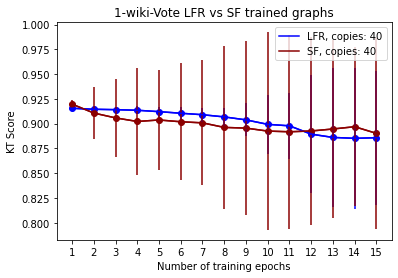

<Figure size 432x288 with 0 Axes>

In [15]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

graphtype = 'LFR'
realgraph = '1-wiki-Vote'
size = 10000

with open(f"{graphtype}_real_performance_full_{realgraph}.pickle",'rb') as f:
    data = pickle.load(f)

data = data['LFR']
true = data[f"{size}_size"]['real']

plotting_data = {}

for c in [40]:# [1,10,20,40]:
    
    plotting_data[c] = {'xs':[], 'ys':[],'err':[]}

    for epoch in range(15):

        plotting_data[c]['xs'].append(epoch)
        
        aux = []
        
        for seed in range(15): #range(15):

            # {'pred':r['pred'],'kt':r["kt"]} -> schema
            pred = data[f"{size}_size"][f"{c}_copies"]['pred'][f'{epoch}_epoch'][f"{seed}_seed"]
            aux.append(pred['kt'])
            
        plotting_data[c]['ys'].append(round(np.mean(np.array(aux)),4))
        plotting_data[c]['err'].append(round(np.std(np.array(aux)),4))


for c in plotting_data:
    
    xs = [j+1 for j in plotting_data[c]['xs']]
    ys = plotting_data[c]['ys']
    err = plotting_data[c]['err']
    plt.errorbar(xs[:],ys[:],err[:],c='b')
    plt.scatter(xs[:],ys[:],c='b')
    plt.plot(xs,ys,c='b',label=f'LFR, copies: {c}')

graphtype = 'SF'
realgraph = '1-wiki-Vote'
size = 10000

with open(f"{graphtype}_real_performance_full_{realgraph}.pickle",'rb') as f:
    data = pickle.load(f)

data = data['SF']
true = data[f"{size}_size"]['real']

plotting_data = {}

for c in [40]:# [1,10,20,40]:
    
    plotting_data[c] = {'xs':[], 'ys':[],'err': []}

    for epoch in range(15):

        plotting_data[c]['xs'].append(epoch)
        
        aux = []
        
        for seed in range(15): #range(15):

            # {'pred':r['pred'],'kt':r["kt"]} -> schema
            pred = data[f"{size}_size"][f"{c}_copies"]['pred'][f'{epoch}_epoch'][f"{seed}_seed"]
            aux.append(pred['kt'])
            
        plotting_data[c]['ys'].append(round(np.mean(np.array(aux)),4))
        plotting_data[c]['err'].append(round(np.std(np.array(aux)),4))

for c in plotting_data:
    xs = [j+1 for j in plotting_data[c]['xs']]
    ys = plotting_data[c]['ys']
    err = plotting_data[c]['err']
    plt.errorbar(xs[:],ys[:],err[:],c='darkred')
    plt.scatter(xs[:],ys[:],c='darkred')
    plt.plot(xs,ys,c='darkred',label=f'SF, copies: {c}')


plt.title(f"{realgraph} LFR vs SF trained graphs")
plt.xlabel("Number of training epochs")
plt.ylabel("KT Score")

plt.xticks(range(1,16),xs)
plt.legend()
plt.show()
plt.clf()